In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [161]:
# Importing the dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [164]:
#updating column names
df.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

First We need to convert the column Date into a Date Time Column

In [165]:
df["date"] = pd.to_datetime(df["date"])

In [166]:
df['year'] = df["date"].dt.year
df["Month"] = df["date"].dt.month

In [167]:
df.drop("date",axis=1,inplace=True)

In [168]:
df.head()

,state,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,year,Month
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74,2020,1
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74,2020,2
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74,2020,3
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74,2020,4
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74,2020,5


In [16]:
import calendar
df["Month_Name"] = df["Month"].apply(lambda x : calendar.month_abbr[x])


In [17]:
df.head()

,state,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,Month,year,Month_Name
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74,1,2020,Jan
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74,2,2020,Feb
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74,3,2020,Mar
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74,4,2020,Apr
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74,5,2020,May


In [18]:
df.Month_Name.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct'], dtype=object)

# 1 . Top 10 states with Estimated Unemployment Rate quaterly wise

# 1.1 January 

In [19]:
plt.style.use("Solarize_Light2")

In [20]:
df_Jan = df[df["Month_Name"] == "Jan"].sort_values(by="estimated unemployment rate",ascending=False).iloc[:,[0,2]].reset_index(drop=True)[0:10]

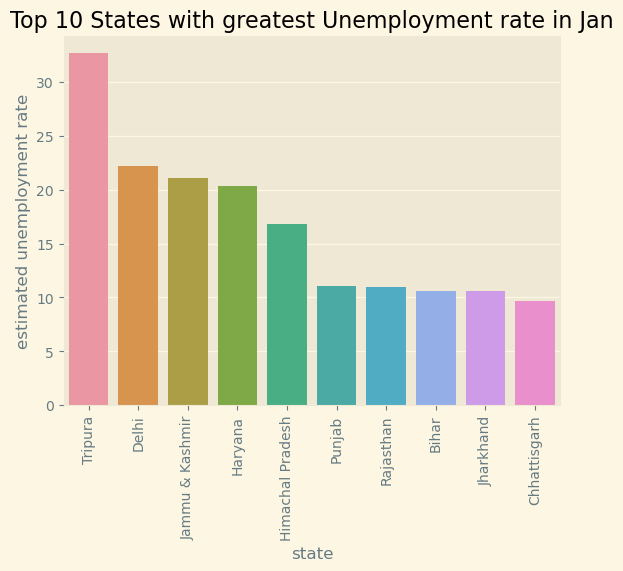

In [21]:
sns.barplot(x=df_Jan["state"],y=df_Jan["estimated unemployment rate"])
plt.xticks(rotation=90)
plt.title("Top 10 States with greatest Unemployment rate in Jan");

Inference :
   1. Tripura has the highest estimated umemploment rate in january .
   2. Chattisgarh has the least eastimated inemployment rate in january .

# 1.2. April


In [22]:
df_Apr = df[df["Month_Name"] == "Apr"].sort_values(by="estimated unemployment rate",ascending=False).iloc[:,[0,2]].reset_index(drop=True)[0:10]

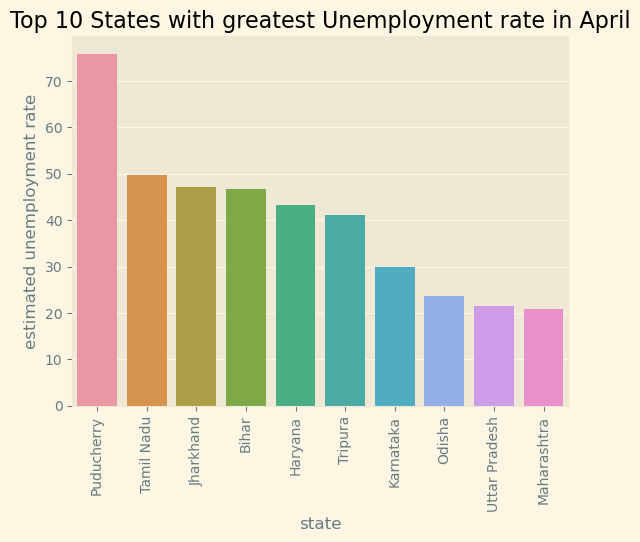

In [23]:
sns.barplot(x=df_Apr["state"],y=df_Apr["estimated unemployment rate"])
plt.xticks(rotation=90)
plt.title("Top 10 States with greatest Unemployment rate in April");

Inference :
  1. Puducherry after 3 months came to the first to cross 75 as estimated unemployment rate in April .
  2. This shows that at this time covid has hit to India .

# 1.3. August

In [24]:
df_Aug = df[df["Month_Name"] == "Aug"].sort_values(by="estimated unemployment rate",ascending=False).iloc[:,[0,2]].reset_index(drop=True)[0:10]

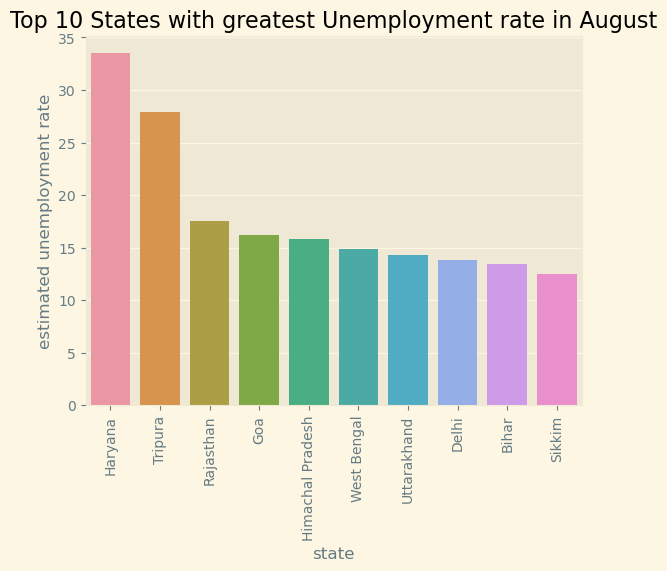

In [25]:
sns.barplot(x=df_Aug["state"],y=df_Aug["estimated unemployment rate"])
plt.xticks(rotation=90)
plt.title("Top 10 States with greatest Unemployment rate in August");

Inference :
   1. Haryana has come to the top in August and Sikkim has nearly come to Maharasthra place in jan .   
   2. West Bengal has only increased after 6 months but not shown any increase before this .

# 1.4 October

In [26]:
df_Oct = df[df["Month_Name"] == "Oct"].sort_values(by="estimated unemployment rate",ascending=False).iloc[:,[0,2]].reset_index(drop=True)[0:10]

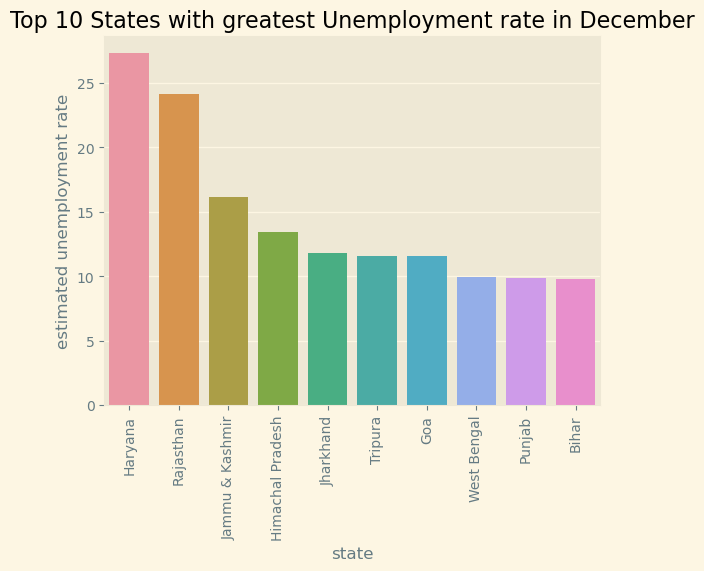

In [27]:
sns.barplot(x=df_Oct["state"],y=df_Oct["estimated unemployment rate"])
plt.xticks(rotation=90)
plt.title("Top 10 States with greatest Unemployment rate in December");

Inference :
   1. Haryana Remains on the top of the estimated unemployment Rate .
   2. Tripura becomes low on the October Month and has low unemployment rate . 

# 2. States with mean unestimated uneployment Rate 

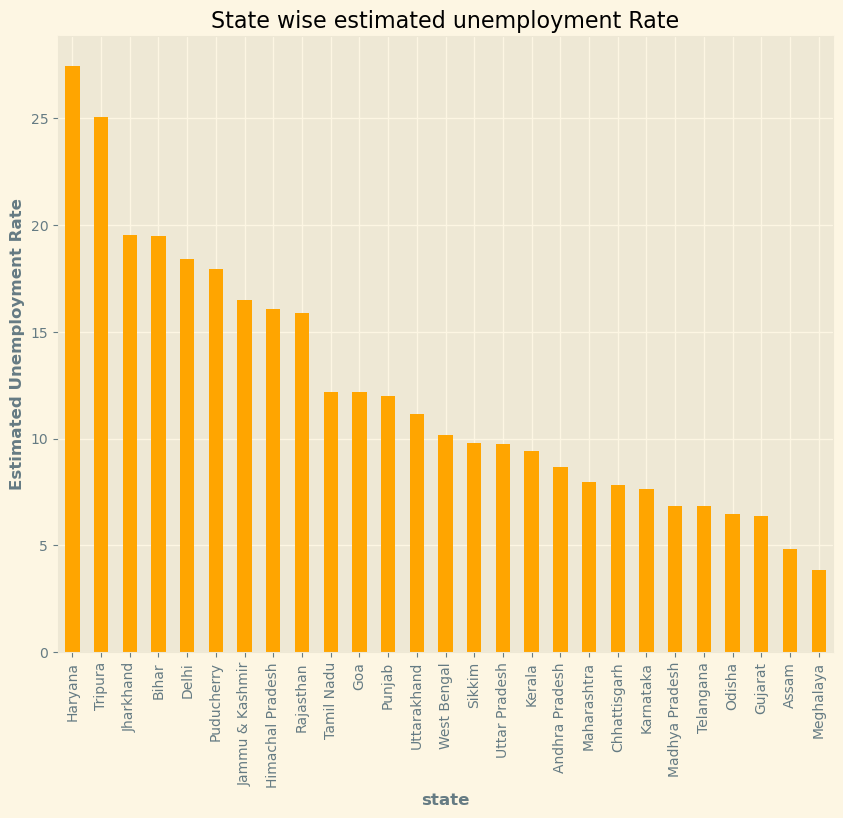

In [28]:
plt.figure(figsize=(10,8))
plt.title("State wise estimated unemployment Rate")
plt.xlabel("States",fontweight="bold")
plt.ylabel("Estimated Unemployment Rate",fontweight="bold")
df.groupby("state").mean(numeric_only=True)["estimated unemployment rate"].sort_values(ascending=False).plot(kind="bar",color="orange");

Inference :
   1. Haryana and Tripura remains on the top as we infer before also. 
   2. Meghalaya gets the lowest position .
   3. West Bengal remains in the middle as we saw .

# 3. States Estimated Unemployment Rate with according to Month Wise

In [29]:
def plot(dataset,State):
    sns.barplot(x=df[df["state"]==State].iloc[:,[0,2,-1]]["Month_Name"],y=df[df["state"]==State].iloc[:,[0,2,-1]]["estimated unemployment rate"])
    plt.title(f"{State}")

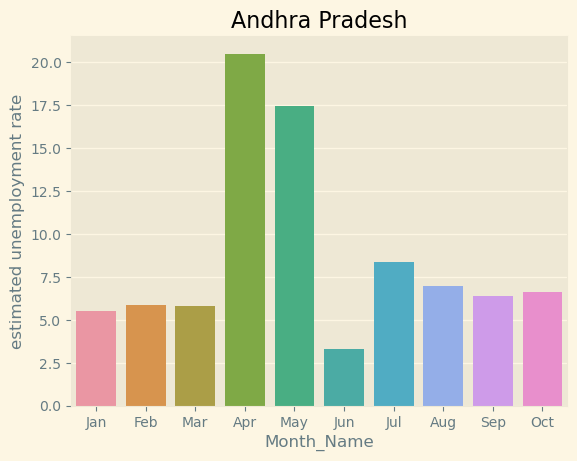

In [30]:
plot(df,"Andhra Pradesh")

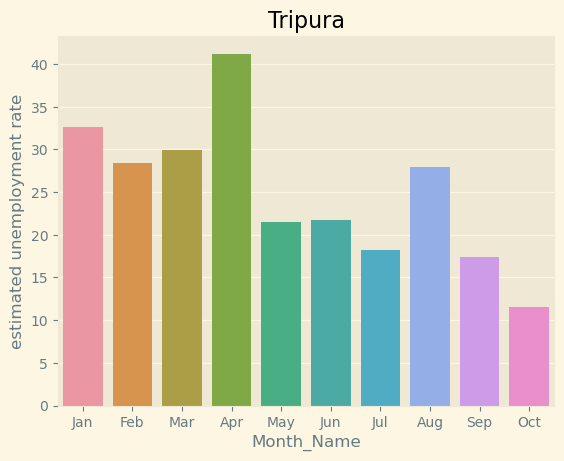

In [31]:
plot(df,"Tripura")

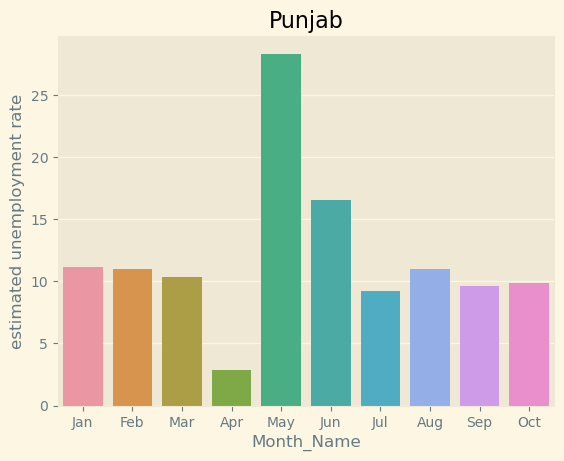

In [32]:
plot(df,"Punjab")

# 4. Splitiing the data into before lockdown and after lockdown

In [33]:
bf_lock = df[(df['Month'] >= 1) & (df['Month'] <=4)]
lock = df[(df["Month"]>=4) & (df["Month"]<=8)]

mean_bf_lock = bf_lock.groupby("state").mean(numeric_only=True)["estimated unemployment rate"].reset_index()
mean_lock = lock.groupby("state").mean(numeric_only=True)["estimated unemployment rate"].reset_index()

final_df = mean_lock.merge(mean_bf_lock,on="state")

In [34]:
final_df.columns = ["States","After Lockdown","Before Lockdown"]

In [35]:
final_df["Percentage change"] = np.round(((final_df["After Lockdown"]-final_df["Before Lockdown"])/final_df["Before Lockdown"])*100,2)

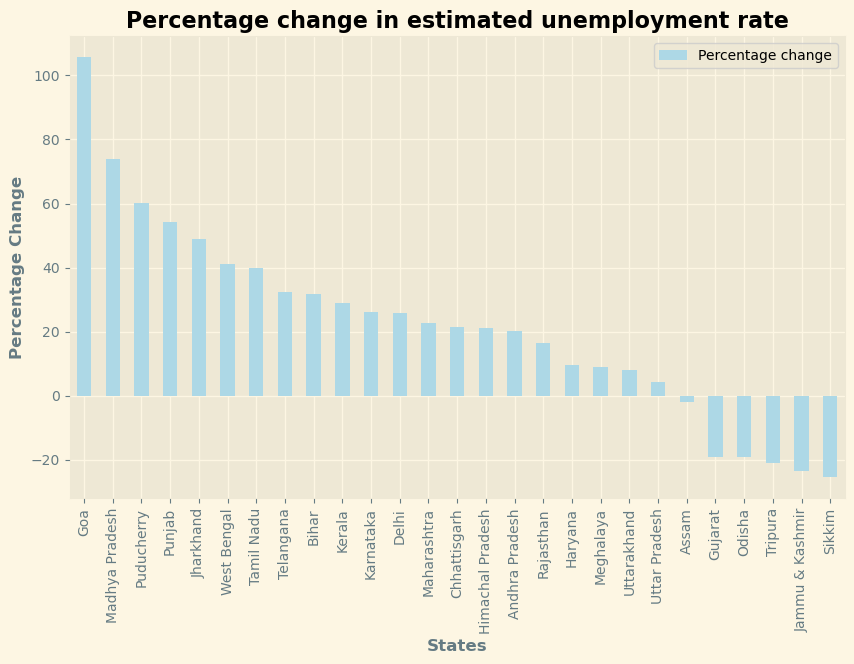

In [49]:
final_df[["States","Percentage change"]].sort_values("Percentage change",ascending=False).set_index("States").plot(kind="bar",figsize=(10,6),color="lightblue")
plt.title("Percentage change in estimated unemployment rate",fontweight="bold")
plt.xlabel("States",fontweight="bold")
plt.ylabel("Percentage Change",fontweight="bold");

<Axes: title={'center': 'Top 20 states with estimated uneomplyment rate after Lockdown'}, xlabel='States'>

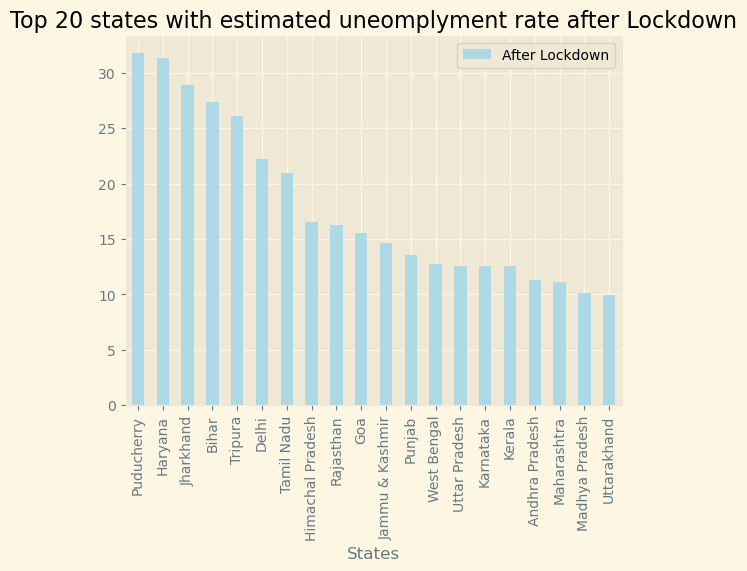

In [172]:
final_df[["States","After Lockdown"]].sort_values(by="After Lockdown",ascending=False)[:20].set_index("States").plot(kind="bar",title="Top 20 states with estimated uneomplyment rate after Lockdown",color="lightblue")

Inference :
   1. Puducherry gets the estimated unemployment Rate high After Lockdown .
   2. Haryana follows Puducherry .
   3. Uttrakhand has the least increase after Lockdown .

<Axes: title={'center': 'Top 20 states with estimated unemployment rate after Lockdown'}, xlabel='States'>

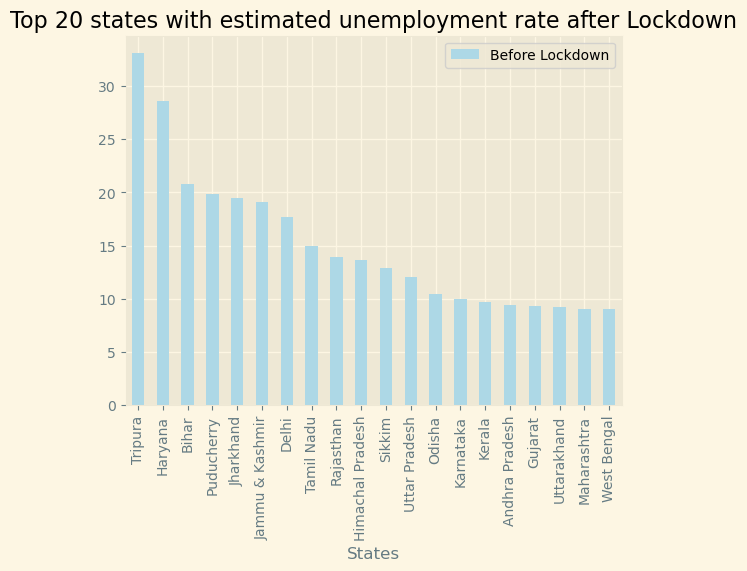

In [174]:
final_df[["States","Before Lockdown"]].sort_values(by="Before Lockdown",ascending=False)[:20].set_index("States").plot(kind="bar",title="Top 20 states with estimated unemployment rate after Lockdown",color="lightblue")

Inference :
  1. Tripura had high estimated unemployment Rate Before Lockdown.
  2. Haryana also had high estimated unemployment Rate Before Lockdown and After Lockdown .
  

# 5. Data Analysis according to region

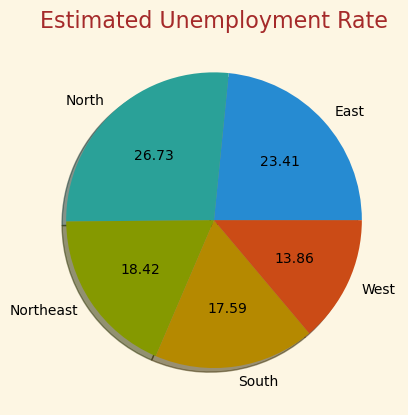

In [83]:
df[["region","estimated unemployment rate"]].groupby("region").mean()["estimated unemployment rate"].plot(kind="pie",shadow=True,autopct="%.2f")
plt.ylabel("")
plt.title("Estimated Unemployment Rate",color="brown");

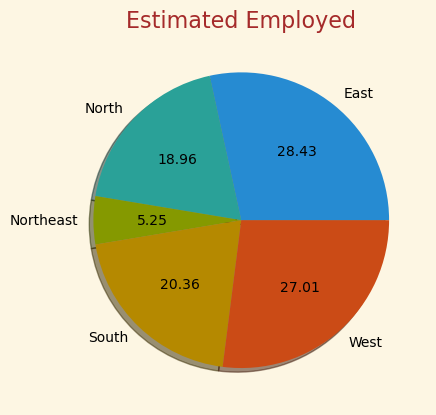

In [84]:
df[["region","estimated employed"]].groupby("region").mean()["estimated employed"].plot(kind="pie",shadow=True,autopct="%.2f")
plt.ylabel("")
plt.title("Estimated Employed",color="brown");

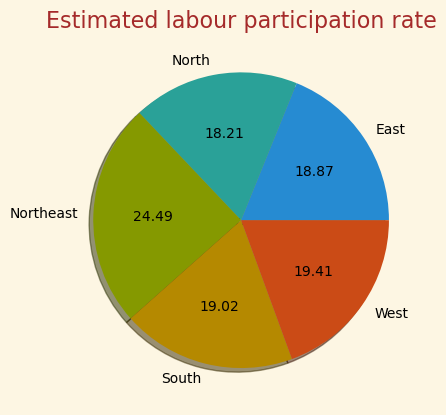

In [86]:
df[["region","estimated labour participation rate"]].groupby("region").mean()["estimated labour participation rate"].plot(kind="pie",shadow=True,autopct="%.2f")
plt.ylabel("")
plt.title("Estimated labour participation rate",color="brown");

# 6. Scatter plots

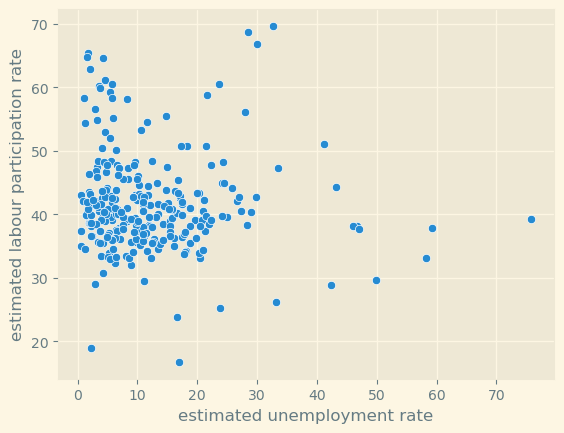

In [140]:
sns.scatterplot(data=df,x="estimated unemployment rate",y="estimated labour participation rate");

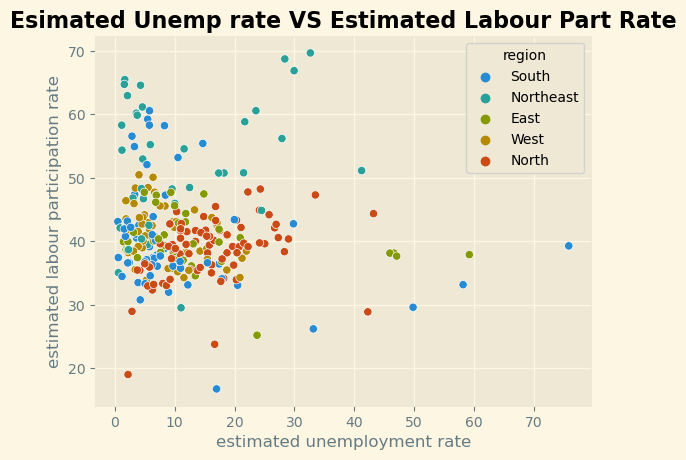

In [139]:
sns.scatterplot(data=df,x="estimated unemployment rate",y="estimated labour participation rate",hue="region");
plt.title("Esimated Unemp rate VS Estimated Labour Part Rate",fontweight="bold");

Inference :
 1. As we can see estimated labour participation rate has less effect on estimated unemployment rate .
 2. But in some points when estimated labour participation rate increases estimated unemployment decreases .

# 7. Estimated Labour Participation

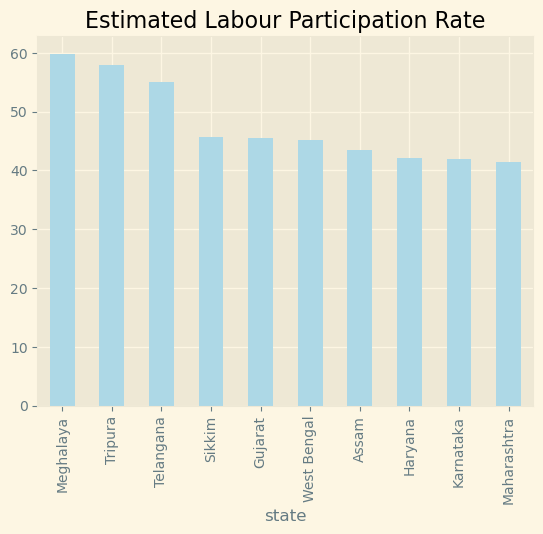

In [185]:
df.groupby("state").mean()["estimated labour participation rate"].sort_values(ascending= False)[0:10].plot(kind="bar",color="lightblue")
plt.title("Estimated Labour Participation Rate");